# Machine Learning with Python

Speaker: Yingzhi Gou

Decision Systems Lab,

University of Wollongong

**NOTE** this jupyter notebook is available on github https://github.com/YingzhiGou/AI-Meetup-Decision-Systems-Lab-UOW


# Acknowledgement

source code in this tutorial is based on the book **Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems** by *Aurélien Géron*

# Software Required

* python 3.5
* numpy
* jupyter
* matplotlib
* scikit-learn

# Classification

to identify to which of the categories a new observation (data entry) belongs, based on the training data.

# Data Set

## MNIST data set

A set of 70,000 small impages of digits handwritten by high school students and employees of the US Census Bureau. 

Each image is labelled with the digit it represents (so we can do supervised learning with this data set).

**Disclaimer:** The algorithms used in this tutorial is not necessarily means they are suitable for creating the prediction models for this dataset but for the purpose of demonstration.

In [1]:
# fetch data set
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="data")  # download data here, it may take some time depends on the network
mnist  # this will show the dataset object

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
# now let's take a look at the data
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# define a function that display the digit image
def show_digit(pixels):
    digit_image = pixels.reshape(28,28)
    plt.imshow(digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

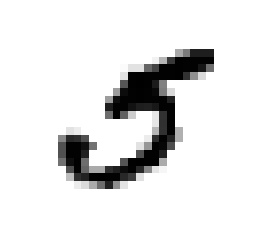

In [5]:
some_digit = X[36000] # select some digit data
show_digit(some_digit)

In [6]:
y[36000]

5.0

# Prepare Data for Learning

## Training data
normally 60%~70% of the labeled data set

## Testing data
the rest of the data set

**NOTE** their are may way to simple the training data, e.g. partation, random simpling, simpling based on the class distribuction of the data set etc. Beware of possible bais introduced in simpling.

In [7]:
# create training and testing sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# shuffling the data set
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary Classification

<img src="https://www.cse.iitk.ac.in/users/se367/10/presentation_local/Binary%20Classification_files/svm.png" title="Ref:wikimedia" width=400px />

For one class, build one classifier.

In this case, let's build a classifier for digit '5'.

In [8]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

## Stochastic Gradient Descent (SGD)

SGD is capable of handling very large dataset efficiently, because it deals with training instances independently, one at a time (suited for *online training*)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
# GSD relies on randomness during training, so if you want reproducible results, random_state should be set
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [10]:
# let's test the model
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

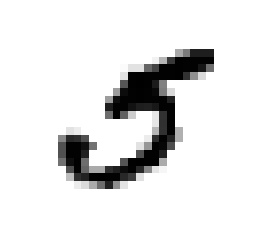

In [11]:
show_digit(some_digit)

In [12]:
some_other_digit = X[23423]
sgd_clf.predict([some_other_digit])

array([False], dtype=bool)

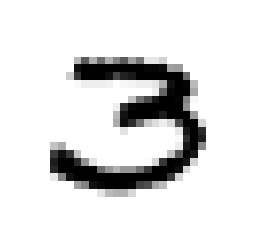

In [13]:
show_digit(some_other_digit)

## Support Vector Machine (SVM)

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_iris_001.png" width=400 title="Image from Scikit-Learn docs" />

SMVs are set of supervised learning methods used for classification, regression and outliers detection.

In [14]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train_5)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
svm_clf.predict([some_digit, some_other_digit])

array([ True, False], dtype=bool)

## Nearest Neighbors Classification

<table>
<tr>
<td> <img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png" alt="Drawing" title="image from scikit-learn docs" width=250 /> </td>
<td> <img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_002.png" alt="Drawing" title="image from scikit-learn docs" width=250 /> </td>
</tr>
</table>

Neighbors-based classification is a type of *instance-based learning*. It does not attempt to construct a general internal model but simply store instances of training data. Classification is computed from a simple majority vote of the nearest neighbors of the input data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knghbr_clf = KNeighborsClassifier()
knghbr_clf.fit(X_train, y_train_5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
knghbr_clf.predict([some_digit, some_other_digit])

array([ True, False], dtype=bool)

## Naive Bayes

Naive Bayes classifier is based on applying Bayes' theorem with the "naive" assumption of independence between every pair of features.

In [18]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train_5)

GaussianNB(priors=None)

In [19]:
nb_clf.predict([some_digit, some_other_digit])

array([ True,  True], dtype=bool)

## Perceptron

Our first *artificial neural network* in this tutorial, which is first created in 1958 by Frank Rosenblatt for pattern recognition, and formally recognized as the first artificial neural network.

In [20]:
from sklearn.linear_model import Perceptron

prcptrn_clf = Perceptron(random_state=42)
prcptrn_clf.fit(X_train, y_train_5)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=42, shuffle=True,
      verbose=0, warm_start=False)

In [21]:
prcptrn_clf.predict([some_digit, some_other_digit])

array([ True, False], dtype=bool)

### Multilayer Perceptron (MLP)

Consists of at least three layers of nodes, except for the input nodes (layer), each node is a neuron that uses a non-linear activation function.

In [22]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()
mlp_clf.fit(X_train, y_train_5)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
mlp_clf.predict([some_digit, some_other_digit])

array([ True, False], dtype=bool)

## Decision Tree (DT)

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png" title="Ref:wikimedia" width=400 />

DTs creates a model that predicts the value of a target variable by learning simple decision rules inferred from the data feature.
DTs are simple to understand and to interpret, and can be visualized; requires little data preparation.
However, DTs can create over-complex trees that do not generalize the data well (over-fitting).

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train_5)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [25]:
dt_clf.predict([some_digit, some_other_digit])

array([ True, False], dtype=bool)

## Random Forest

Random Forest operates by constructing a multitude of decision trees at training time, each tree is built from a sample drawn with replacement from the training set.

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [27]:
forest_clf.predict([some_digit, some_other_digit])

array([ True, False], dtype=bool)

# Performance Measures

Evaluate a classifier is often tricky. There are many performance measures with their own advantages and disadvantages. We will talk about the related concepts more later.

## Cross Validation

We will use $cross\_val\_score()$ function provided by $sklearn.model\_selection$ module, which using K-fold cross-validation. 

K-fold Cross Validation means to split the training set into K-folds then making prediction and evaluating them on each fold using a model trained on the remaining folds.

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([ 0.96175319,  0.96241667,  0.96      ,  0.96208333,  0.94032836])

about 95% accuracy!!!

However ...

In [29]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [30]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([ 0.91091667,  0.91066667,  0.91025   ,  0.91016667,  0.90625   ])

WHY?

because 90% of the data would be "not 5", our data set is biased against "not 5". by simply guessing "not 5", the classifier would have achieve 90% accuracy.

## Confusion Matrix

A much better way to evaluate the performance of a classifier.

<img src="http://3.bp.blogspot.com/_txFWHHNYMJQ/THyADzbutYI/AAAAAAAAAf8/TAXL7lySrko/s1600/Picture+8.png" width=400/>


In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = sgd_clf.predict(X_train)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53430,  1149],
       [  704,  4717]])

Where each row represents a actual class and each column represents a predicted class.

In [33]:
# for random forest
confusion_matrix(y_train_5, forest_clf.predict(X_train))

array([[54579,     0],
       [   61,  5360]])

In [34]:
confusion_matrix(y_train_5, y_train_5)  # if the prediction is 100% accurate

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

$$ precision = \frac{TP}{TP+FP} $$
$$ recall = \frac{TP}{TP+FN} $$

<img src="http://3.bp.blogspot.com/_txFWHHNYMJQ/THyADzbutYI/AAAAAAAAAf8/TAXL7lySrko/s1600/Picture+8.png" width=400/>

In [35]:
from sklearn.metrics import precision_score, recall_score

In [36]:
precision_score(y_train_5, y_train_pred)

0.80412546880327307

In [37]:
recall_score(y_train_5, y_train_pred)

0.87013466150156793

### $F_1$ Score

$F_1$ score is the *harmonic mean* of precision and recall.

$$ F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2\times \frac{precision \times recall}{precision + recall} = \frac{TP}{TP+\frac{FN+FP}{2}} $$

In [38]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.83582882962700455

In [39]:
# put all scores together
# for SGD
from sklearn.metrics import classification_report
print(classification_report(y_train_5, y_train_pred))

             precision    recall  f1-score   support

      False       0.99      0.98      0.98     54579
       True       0.80      0.87      0.84      5421

avg / total       0.97      0.97      0.97     60000



In [40]:
# for random forest
print(classification_report(y_train_5, forest_clf.predict(X_train)))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00     54579
       True       1.00      0.99      0.99      5421

avg / total       1.00      1.00      1.00     60000



### Precision/Recall Tradeoff

Increasing precision reduces recall, and vice versa.

## ROC Curve

The **receiver operating characteristic (ROC)** curve plots the *true positive rate* (another name for recall) against the *false positive rate*.

In [41]:
from sklearn.metrics import roc_curve

y_scores = sgd_clf.decision_function(X_train)
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

print(fpr)
print(tpr)
print(thresholds)

[  0.00000000e+00   0.00000000e+00   1.83220653e-05 ...,   9.95675993e-01
   9.95675993e-01   1.00000000e+00]
[  1.84467810e-04   2.28740085e-02   2.28740085e-02 ...,   9.99815532e-01
   1.00000000e+00   1.00000000e+00]
[  747290.83794328   455289.53561339   455139.03677452 ...,
 -1143000.19292385 -1143360.99146471 -1883290.55933699]


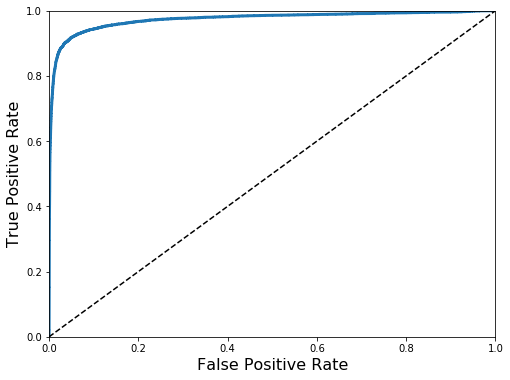

In [42]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

In [43]:
# compute ROC AUC (ROC Area under the curve)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.97368427892342735

In [44]:
y_probas_forest = forest_clf.predict_proba(X_train)
y_probas_forest

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

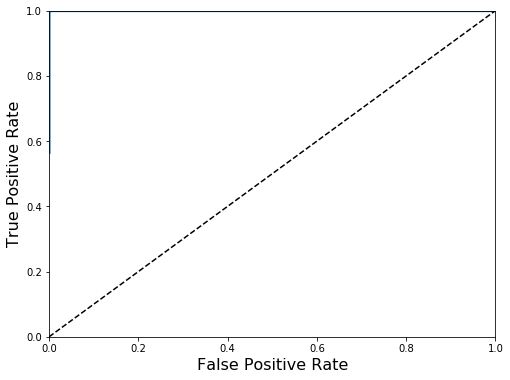

In [45]:
y_scores = y_probas_forest[:, 1]  # only keep the proba of the possitive class
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.show()

In [46]:
roc_auc_score(y_train_5, y_scores)

0.99999747188621724

In [47]:
# let's create a classifier that randomly classifies any input
class RandomBinaryClassifier(BaseEstimator):
    def __init__(self, random_state=None):
        BaseEstimator.__init__(self)
        
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return self.decision_function(X) > 0.5
    def decision_function(self, X):
        np.random.seed(42)
        return np.random.rand(len(X), 1)
    

random_clf = RandomBinaryClassifier(random_state=42)
confusion_matrix(y_train_5, random_clf.predict(X_train))

array([[27158, 27421],
       [ 2833,  2588]])

In [48]:
print(classification_report(y_train_5, random_clf.predict(X_train)))

             precision    recall  f1-score   support

      False       0.91      0.50      0.64     54579
       True       0.09      0.48      0.15      5421

avg / total       0.83      0.50      0.60     60000



In [51]:
# let's compare all the classifiers
plt.figure(figsize=(8,6))  # new figure

def plot_one_roc_curve(y_truth, y_scores, label):
    fpr, tpr, thresholds = roc_curve(y_truth, y_scores)
    auc = roc_auc_score(y_truth, y_scores)
    plt.plot(fpr, tpr, label="{} (auc={})".format(label, auc))

def all_roc_curves():
    # SGD 
    y_scores = sgd_clf.decision_function(X_train)
    plot_one_roc_curve(y_train_5, y_scores, "SGD")

    # SVM
    y_scores = svm_clf.decision_function(X_train)
    plot_one_roc_curve(y_train_5, y_scores, "SVM")

    # Nearest neighbors - don't need to compare this as it is instance-based
    # y_scores = knghbr_clf.predict_proba(X_train)[:, 1]
    # plot_one_roc_curve(y_train_5, y_scores, "Nearest Neighbors")

    # Naive Bayes
    y_scores = nb_clf.predict_proba(X_train)[:, 1]
    plot_one_roc_curve(y_train_5, y_scores, "Naive Bayes")

    # Perceptron
    y_scores = prcptrn_clf.decision_function(X_train)
    plot_one_roc_curve(y_train_5, y_scores, "Perceptron")

    # MLP
    y_scores = mlp_clf.predict_proba(X_train)[:,1]
    plot_one_roc_curve(y_train_5, y_scores, "MLP")

    # Decision Tree
    y_scores = dt_clf.predict_proba(X_train)[:, 1]
    plot_one_roc_curve(y_train_5, y_scores, "DT")

    # random forest
    y_scores = forest_clf.predict_proba(X_train)[:, 1]
    plot_one_roc_curve(y_train_5, y_scores, "Random Forest")

    # random classifier
    y_scores = random_clf.decision_function(X_train)
    plot_one_roc_curve(y_train_5, y_scores, "Random Guess")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc="best")
    plt.show()

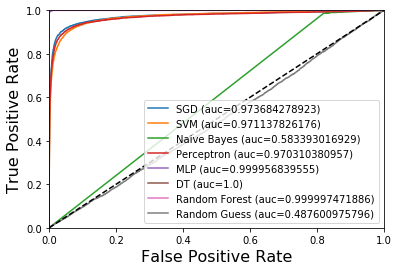

In [53]:
all_roc_curves()